In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report,
                             roc_auc_score, roc_curve)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print("Shape:", df.shape)
df.info()

Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

In [4]:
# TotalCharges is sometimes stored as text, convert to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Remove rows where TotalCharges is missing
df = df.dropna(subset=["TotalCharges"])

# Convert target to 0/1
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [5]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X.shape, y.shape


((7032, 20), (7032,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape)
print("Test :", X_test.shape)


Train: (5625, 20)
Test : (1407, 20)


In [7]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numerical_cols)
    ]
)


Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [8]:
log_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=2000))
])

log_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['customerID', 'gender',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('num', 'passthrough',
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('model', LogisticRegression(max_iter=2000))])

In [9]:
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

print("Logistic Regression Results")
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall   :", recall_score(y_test, y_pred_log))
print("F1 Score :", f1_score(y_test, y_pred_log))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_log))

print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Results
Accuracy : 0.7938877043354655
Precision: 0.6213872832369942
Recall   : 0.5748663101604278
F1 Score : 0.5972222222222222
ROC-AUC  : 0.8343941378364248

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1033
           1       0.62      0.57      0.60       374

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



In [10]:
cm = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[902 131]
 [159 215]]


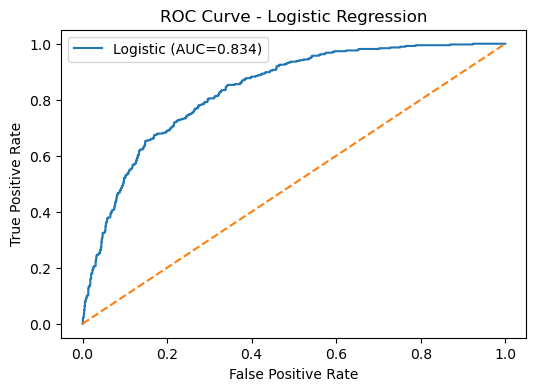

In [11]:
fpr, tpr, _ = roc_curve(y_test, y_prob_log)
auc = roc_auc_score(y_test, y_prob_log)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"Logistic (AUC={auc:.3f})")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


In [12]:
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        class_weight="balanced"
    ))
])

rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['customerID', 'gender',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('num', 'passthrough',
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=300, random_state=42))])

In [13]:
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Results")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1 Score :", f1_score(y_test, y_pred_rf))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_rf))

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Results
Accuracy : 0.7889125799573561
Precision: 0.6270627062706271
Recall   : 0.5080213903743316
F1 Score : 0.5612998522895126
ROC-AUC  : 0.8207714926153512

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



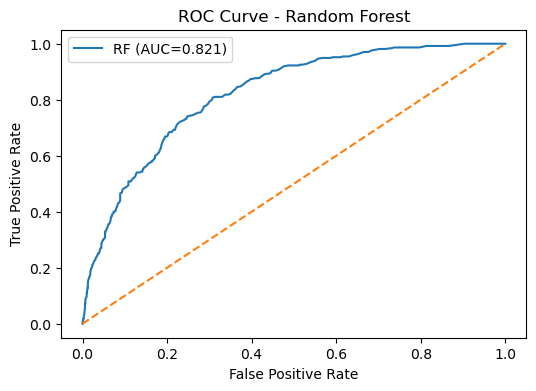

In [14]:
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
auc = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"RF (AUC={auc:.3f})")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


In [16]:
from xgboost import XGBClassifier

xgb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric="logloss"
    ))
])

xgb_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['customerID', 'gender',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=500, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [17]:
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost Results")
print("Accuracy :", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall   :", recall_score(y_test, y_pred_xgb))
print("F1 Score :", f1_score(y_test, y_pred_xgb))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_xgb))

print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Results
Accuracy : 0.7775408670931059
Precision: 0.5927051671732523
Recall   : 0.5213903743315508
F1 Score : 0.5547652916073968
ROC-AUC  : 0.8231243302566119

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.59      0.52      0.55       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.70      1407
weighted avg       0.77      0.78      0.77      1407



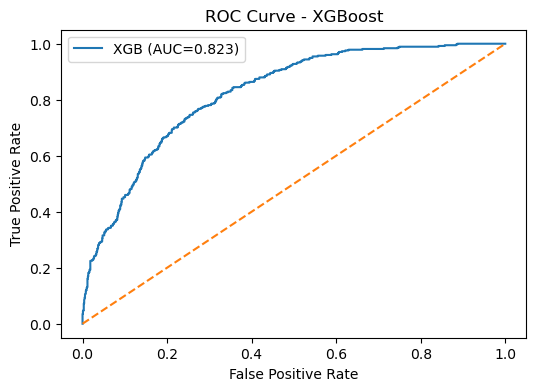

In [18]:
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
auc = roc_auc_score(y_test, y_prob_xgb)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"XGB (AUC={auc:.3f})")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()


In [19]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "ROC_AUC": [
        roc_auc_score(y_test, y_prob_log),
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_xgb)
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ]
}).sort_values("ROC_AUC", ascending=False)

results


,Model,ROC_AUC,Accuracy
0,Logistic Regression,0.834394,0.793888
2,XGBoost,0.823124,0.777541
1,Random Forest,0.820771,0.788913


In [20]:
# We'll use XGBoost outputs for final churn probability table
final_probs = y_prob_xgb
final_preds = y_pred_xgb

churn_table = X_test.copy()

# customerID may exist in dataset
if "customerID" in churn_table.columns:
    churn_table = churn_table[["customerID"]].copy()

churn_table["Actual_Churn"] = y_test.values
churn_table["Predicted_Churn"] = final_preds
churn_table["Churn_Probability"] = final_probs

churn_table = churn_table.sort_values("Churn_Probability", ascending=False)
churn_table.head(15)


,customerID,Actual_Churn,Predicted_Churn,Churn_Probability
2631,6861-XWTWQ,1,1,0.963180
2464,2609-IAICY,1,1,0.956131
5826,9507-EXLTT,1,1,0.943143
3380,5178-LMXOP,1,1,0.939915
1401,5419-CONWX,1,1,0.935860
3727,9057-SIHCH,1,1,0.934991
4678,3006-XIMLN,1,1,0.930845
2753,6857-VWJDT,1,1,0.927852
3906,6372-RFVNS,1,1,0.925202
1731,8375-DKEBR,1,1,0.924284


In [21]:
def risk_segment(p):
    if p >= 0.80:
        return "Very High Risk"
    elif p >= 0.60:
        return "High Risk"
    elif p >= 0.40:
        return "Medium Risk"
    else:
        return "Low Risk"

churn_table["Risk_Segment"] = churn_table["Churn_Probability"].apply(risk_segment)

churn_table["Risk_Segment"].value_counts()


Risk_Segment
Low Risk          977
Medium Risk       200
High Risk         149
Very High Risk     81
Name: count, dtype: int64

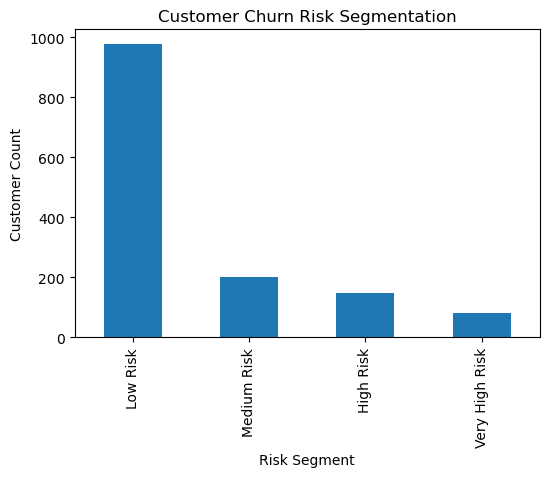

In [22]:
churn_table["Risk_Segment"].value_counts().plot(kind="bar", figsize=(6,4), title="Customer Churn Risk Segmentation")
plt.xlabel("Risk Segment")
plt.ylabel("Customer Count")
plt.show()


In [23]:
# Get transformed feature names from OneHotEncoder
ohe = xgb_model.named_steps["preprocessor"].named_transformers_["cat"]
ohe_features = ohe.get_feature_names_out(categorical_cols)

all_features = np.concatenate([ohe_features, numerical_cols])

importances = xgb_model.named_steps["model"].feature_importances_

fi = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
}).sort_values("Importance", ascending=False)

fi.head(15)


,Feature,Importance
5657,Contract_Month-to-month,0.313600
5637,InternetService_Fiber optic,0.117099
5639,OnlineSecurity_No,0.072291
5648,TechSupport_No,0.045947
5659,Contract_Two year,0.032345
5636,InternetService_DSL,0.030083
5640,OnlineSecurity_No internet service,0.020863
5667,tenure,0.018313
5632,PhoneService_Yes,0.018307
5656,StreamingMovies_Yes,0.017407


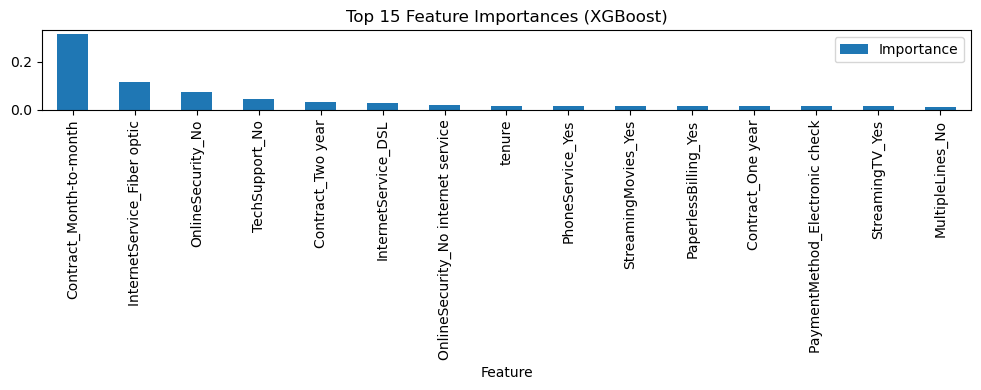

In [24]:
fi.head(15).plot(x="Feature", y="Importance", kind="bar", figsize=(10,4), title="Top 15 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()


In [25]:
churn_table.to_csv("churn_predictions.csv", index=False)
fi.to_csv("feature_importance.csv", index=False)

print("✅ Exported files:")
print("1) churn_predictions.csv")
print("2) feature_importance.csv")

✅ Exported files:
1) churn_predictions.csv
2) feature_importance.csv
